## Airnb Listing Price

### Importing Standard LIbraries

In [248]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Loading Data

In [249]:
pd.set_option('display.max_columns',None)
df = pd.read_csv('airbnb_listing_train.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price
0,11602914,Luxury home 100m2+garden in center!,3123809,Marjolein,NaN,De Pijp - Rivierenbuurt,52.35368,4.90177,Entire home/apt,3,13,15-02-2020,0.27,1,0,220
1,13289321,East is where your home is!,10259430,Ana,NaN,Oud-Oost,52.35728,4.92052,Entire home/apt,4,14,19-06-2019,0.29,1,0,110
2,40779315,Amsterdam Central - LUXURY house in BUSY STREET,224969266,Mark,NaN,Centrum-West,52.37582,4.89850,Entire home/apt,2,9,16-03-2020,1.65,1,7,100
3,7820311,great appartment down town,693472,Ayden,NaN,Westerpark,52.37792,4.87300,Entire home/apt,3,42,17-02-2020,0.72,1,0,130
4,27346603,Private room with canal view in peaceful area,41888346,Alissa,NaN,Westerpark,52.38051,4.87493,Private room,2,89,26-02-2020,4.02,1,24,90


In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12901 entries, 0 to 12900
Data columns (total 16 columns):
id                                12901 non-null int64
name                              12879 non-null object
host_id                           12901 non-null int64
host_name                         12893 non-null object
neighbourhood_group               0 non-null float64
neighbourhood                     12901 non-null object
latitude                          12901 non-null float64
longitude                         12901 non-null float64
room_type                         12901 non-null object
minimum_nights                    12901 non-null int64
number_of_reviews                 12901 non-null int64
last_review                       11305 non-null object
reviews_per_month                 11305 non-null float64
calculated_host_listings_count    12901 non-null int64
availability_365                  12901 non-null int64
price                             12901 non-null int64
dt

### Data Wrangling

In [251]:
print(df['host_name'].nunique())
print(df['neighbourhood'].nunique())
print(df['room_type'].nunique())
print(df['calculated_host_listings_count'].nunique())
print(df['availability_365'].nunique())

4536
22
4
26
366


In [252]:
df.drop(['id','name', 'host_id','neighbourhood_group','host_name','last_review'],axis = 1,inplace = True)

##### checking the skewness of price column

skewness:  22.18781135293427
kurtosis:  635.6268724296101


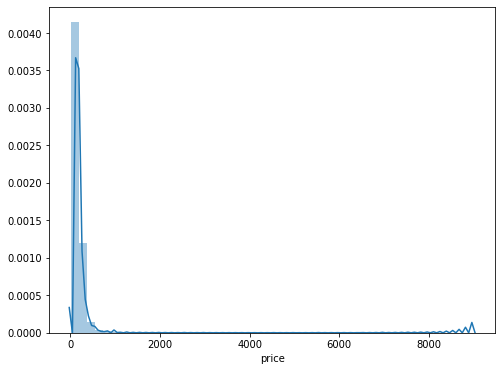

In [253]:
plt.figure(figsize = (8,6))
sns.distplot(df['price'])
print('skewness: ',df['price'].skew())
print('kurtosis: ',df['price'].kurt())

The price data is highly unsymmetrical with long tails

##### Lets check correlation heat map

(8.0, 0.0)

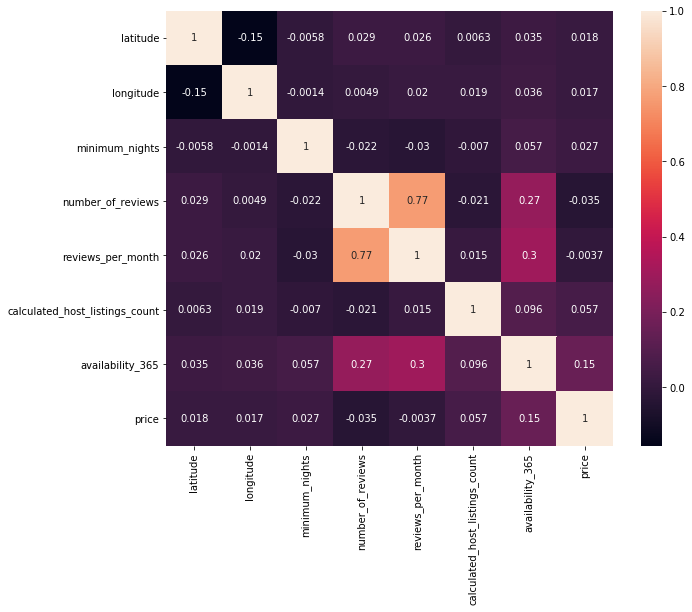

In [254]:
plt.figure(figsize = (10,8))
axes =sns.heatmap(df.corr(),annot = True)
b,t = axes.get_ylim()
axes.set_ylim(b+0.5,t-0.5)

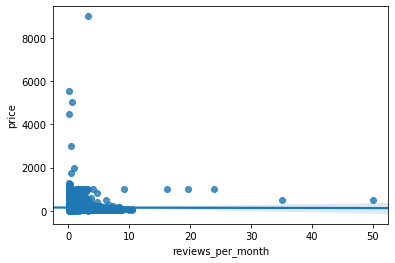

In [255]:
sns.regplot(x = 'reviews_per_month',y = 'price',data = df)

In [256]:
df['calculated_host_listings_count'].unique()

array([ 1,  3,  4,  2,  9, 28,  5, 38, 12, 78,  6, 31, 18,  8, 11, 15, 10,
       13, 42, 21, 34, 19, 14,  7, 17, 16], dtype=int64)

##### Checking outliers

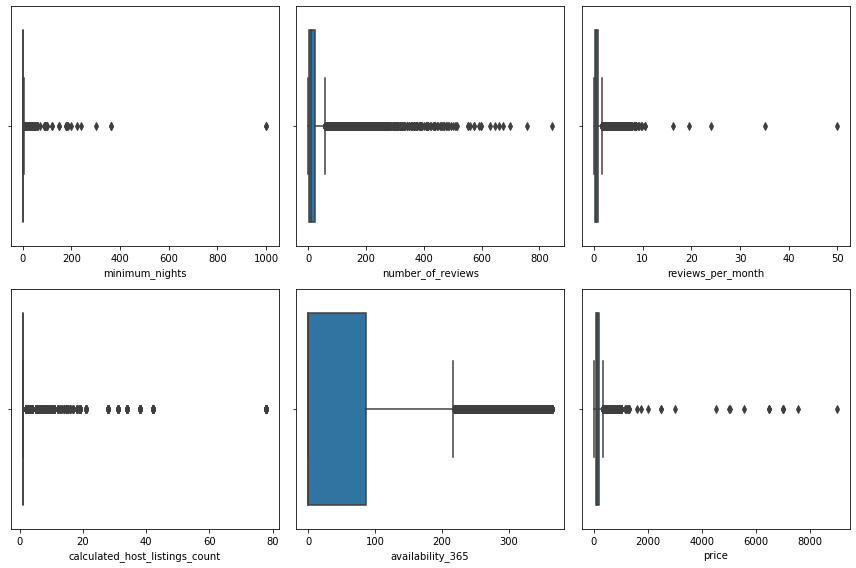

In [257]:
my_col = ['minimum_nights','number_of_reviews', 'reviews_per_month','calculated_host_listings_count', 'availability_365', 
          'price']
fig,axes = plt.subplots(2,3,figsize =(12,8))
for i in range(6):
    if i<3:
        sns.boxplot(x = df[my_col[i]],ax = axes[0,i])
    else:
        sns.boxplot(x = df[my_col[i]],ax = axes[1,i-3])   
plt.tight_layout()

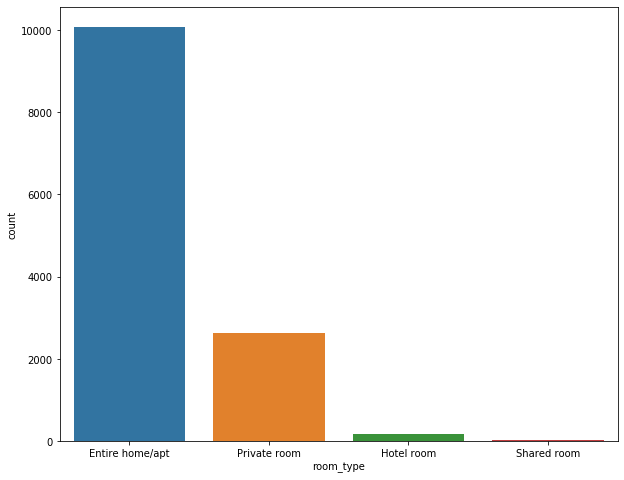

In [258]:
plt.figure(figsize = (10,8))
sns.countplot(x = 'room_type', order = df['room_type'].value_counts().index, data = df)

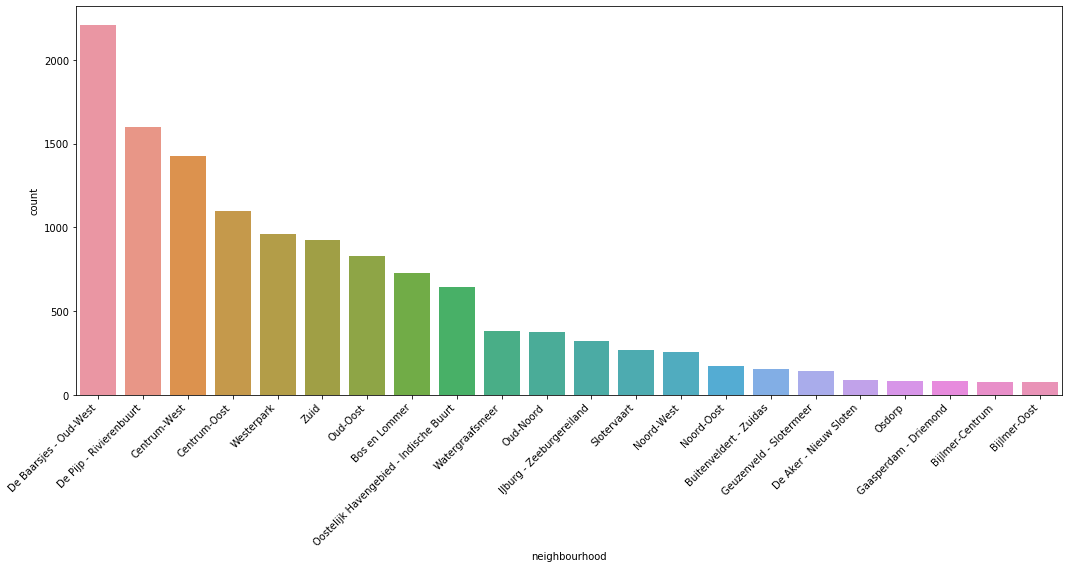

In [259]:
plt.figure(figsize = (15,8))
sns.countplot(x = 'neighbourhood',order = df['neighbourhood'].value_counts().index, data = df)
plt.xticks(rotation = 45,horizontalalignment = 'right' )
plt.tight_layout()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F5ACC8BA08>,
      dtype=object)

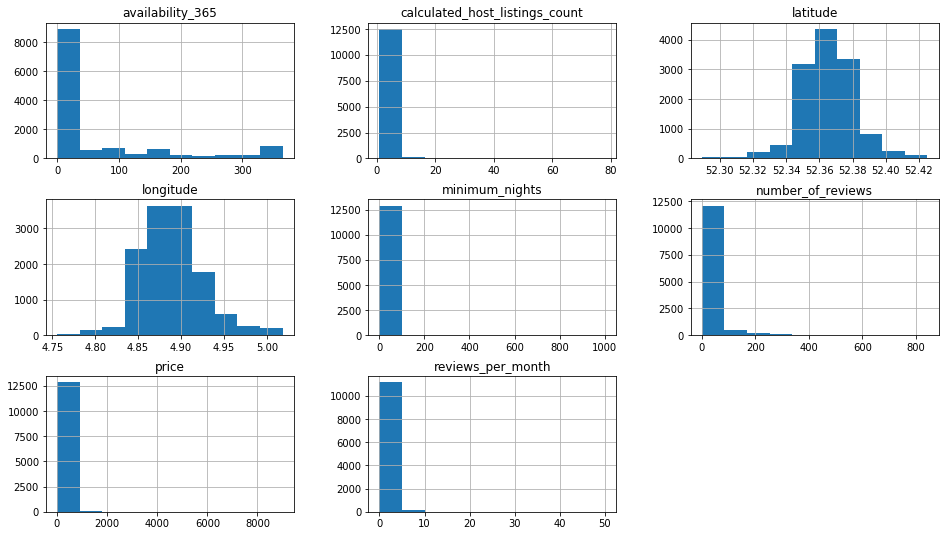

In [260]:
df.hist(figsize = (16,9))

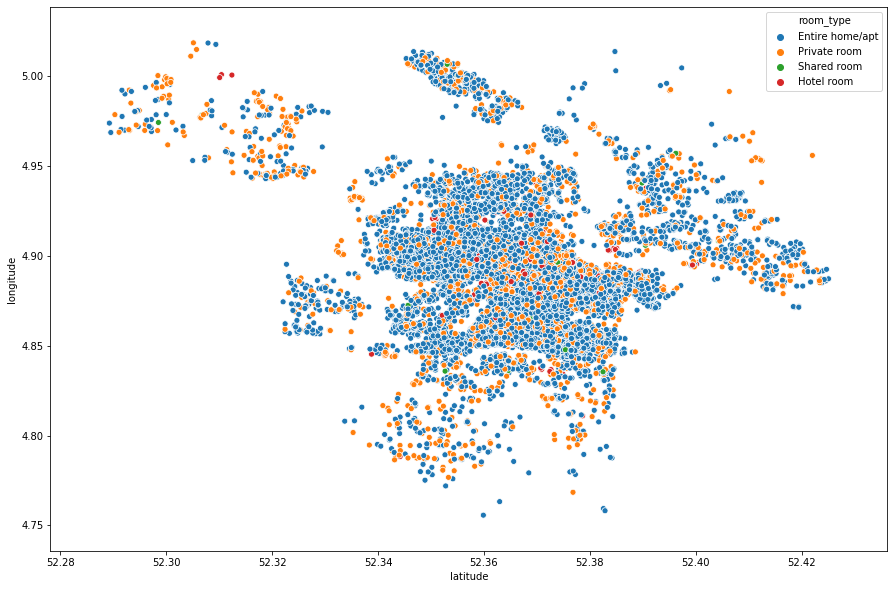

In [261]:
plt.figure(figsize = (15,10))
sns.scatterplot(x = 'latitude',y = 'longitude',data = df, hue = 'room_type')

In [262]:
df.head()

,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
0,De Pijp - Rivierenbuurt,52.35368,4.90177,Entire home/apt,3,13,0.27,1,0,220
1,Oud-Oost,52.35728,4.92052,Entire home/apt,4,14,0.29,1,0,110
2,Centrum-West,52.37582,4.89850,Entire home/apt,2,9,1.65,1,7,100
3,Westerpark,52.37792,4.87300,Entire home/apt,3,42,0.72,1,0,130
4,Westerpark,52.38051,4.87493,Private room,2,89,4.02,1,24,90


### Data Preprocessing

#### Data Imputation

In [263]:
df.drop(['latitude','longitude'],axis = 1,inplace = True)

In [264]:
df.isnull().sum()/len(df)*100

neighbourhood                      0.000000
room_type                          0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
reviews_per_month                 12.371134
calculated_host_listings_count     0.000000
availability_365                   0.000000
price                              0.000000
dtype: float64

In [265]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(df['reviews_per_month'].mode()[0])

In [266]:
df.isnull().sum()/len(df)*100

neighbourhood                     0.0
room_type                         0.0
minimum_nights                    0.0
number_of_reviews                 0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
price                             0.0
dtype: float64

#### Encoding

In [267]:
df.dtypes

neighbourhood                      object
room_type                          object
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
price                               int64
dtype: object

In [268]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le

LabelEncoder()

In [270]:
df[['neighbourhood']] = le.fit_transform(df[['neighbourhood']])

In [271]:
data_ohe = pd.get_dummies(df['room_type'])
data_ohe.head()

,Entire home/apt,Hotel room,Private room,Shared room
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,0,0,1,0


In [272]:
df = pd.concat([df,data_ohe],axis =1)
df.drop('room_type',axis = 1, inplace = True)

In [273]:
df.head()

,neighbourhood,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price,Entire home/apt,Hotel room,Private room,Shared room
0,8,3,13,0.27,1,0,220,1,0,0,0
1,17,4,14,0.29,1,0,110,1,0,0,0
2,5,2,9,1.65,1,7,100,1,0,0,0
3,20,3,42,0.72,1,0,130,1,0,0,0
4,20,2,89,4.02,1,24,90,0,0,1,0


#### No need for feature scaling as values are around 

### Train_Test_Split

In [274]:
X = df.drop('price',axis = 1)
y = df['price']

In [275]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test  = train_test_split(X,y,test_size = 0.25,random_state = 101)

In [276]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9675, 10)
(3226, 10)
(9675,)
(3226,)


### Model_fitting

In [277]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [278]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [279]:
lr.score(X_train,y_train)

0.03978575252022909

### Predictions and Evaluations

In [280]:
from sklearn.metrics import r2_score

In [281]:
y_pred = lr.predict(X_test)

In [282]:
r2_score(y_pred,y_test)

-27.571318551624504

#### The model is pretty bad considering high variance and high bias